In [1]:
import pyspark
from pyspark.sql.functions import *

In [2]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()
spark

# Exercises
## Data Acquisition

This exercises uses the `case.csv`, `dept.csv`, and `source.csv` files from the san antonio 311 call dataset.

1. Read the case, department, and source data into their own spark dataframes.
2. Let's see how writing to the local disk works in spark:

    - Write the code necessary to store the source data in both csv and json format, store these as `sources_csv` and `sources_json`
    - Inspect your folder structure. What do you notice?
3. Inspect the data in your dataframes. Are the data types appropriate? Write the code necessary to cast the values to the appropriate types.

In [3]:
case = spark.read.csv("data/case.csv", header=True, inferSchema=True)

In [4]:
case.show(3, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 1/1/18 0:42          
 case_closed_date     | 1/1/18 12:29         
 SLA_due_date         | 9/26/20 0:42         
 case_late            | NO                   
 num_days_late        | -998.5087616000001   
 case_closed          | YES                  
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 5                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 1/1/18 0:46          
 case_closed_date     | 1/3/18 8:11          
 SLA_due_date         | 1/5/18 8:30          
 case_late            | NO                   
 num_days_late        | -2.0126041

In [5]:
dept = spark.read.csv("data/dept.csv", header=True, inferSchema=True)

In [6]:
dept.show(3, vertical=True)

-RECORD 0--------------------------------------
 dept_division          | 311 Call Center      
 dept_name              | Customer Service     
 standardized_dept_name | Customer Service     
 dept_subject_to_SLA    | YES                  
-RECORD 1--------------------------------------
 dept_division          | Brush                
 dept_name              | Solid Waste Manag... 
 standardized_dept_name | Solid Waste          
 dept_subject_to_SLA    | YES                  
-RECORD 2--------------------------------------
 dept_division          | Clean and Green      
 dept_name              | Parks and Recreation 
 standardized_dept_name | Parks & Recreation   
 dept_subject_to_SLA    | YES                  
only showing top 3 rows



In [7]:
source = spark.read.csv("data/source.csv", header=True, inferSchema=True)

In [8]:
source.show(3, vertical=True)

-RECORD 0---------------------------
 source_id       | 100137           
 source_username | Merlene Blodgett 
-RECORD 1---------------------------
 source_id       | 103582           
 source_username | Carmen Cura      
-RECORD 2---------------------------
 source_id       | 106463           
 source_username | Richard Sanchez  
only showing top 3 rows



In [9]:
# Write the code necessary to store the source data in both csv and json format, 
# store these as sources_csv and sources_json
source.write.csv("data/sources_csv", mode="overwrite")

In [10]:
source.write.json("data/sources_json", mode="overwrite")

In [11]:
case.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: string (nullable = true)
 |-- case_closed_date: string (nullable = true)
 |-- SLA_due_date: string (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)



In [12]:
case = case.withColumnRenamed("SLA_due_date", "case_due_date")
case.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: string (nullable = true)
 |-- case_closed_date: string (nullable = true)
 |-- case_due_date: string (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)



In [13]:
# change data types for date columns
case = (
    case.withColumn("case_opened_date", to_timestamp(col("case_opened_date"), "M/d/yy H:mm"))
    .withColumn("case_closed_date", to_timestamp(col("case_closed_date"), "M/d/yy H:mm"))
    .withColumn("case_due_date", to_timestamp(col("case_due_date"), "M/d/yy H:mm"))
)

In [14]:
case.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)



In [15]:
case.show(2, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | NO                   
 num_days_late        | -998.5087616000001   
 case_closed          | YES                  
 dept_division        | Field Operations     
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 5                    
-RECORD 1------------------------------------
 case_id              | 1014127333           
 case_opened_date     | 2018-01-01 00:46:00  
 case_closed_date     | 2018-01-03 08:11:00  
 case_due_date        | 2018-01-05 08:30:00  
 case_late            | NO                   
 num_days_late        | -2.0126041

In [16]:
# .trim == .strip in base python
# removes leading and trailing whitespace
case = case.withColumn("request_address", lower(trim(col("request_address"))))

In [17]:
# create zipcode column
case = case.withColumn("zipcode", regexp_extract(col("request_address"), r"\d+$", 0))

In [18]:
case.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)
 |-- zipcode: string (nullable = true)



In [19]:
case = (
    case.withColumn('case_late', col('case_late') == 'YES')
    .withColumn('case_closed', col('case_closed') == 'YES')
)

In [20]:
case = (
    case.withColumn("case_age", datediff(current_timestamp(), "case_opened_date"))
    .withColumn("days_to_closed", datediff("case_closed_date", "case_opened_date"))
    .withColumn("case_lifetime", when(col("case_closed"), col("days_to_closed")).otherwise(col("case_age")))
    .drop("case_age", "days_to_closed")
)

In [21]:
case.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: boolean (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: boolean (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- case_lifetime: integer (nullable = true)



In [22]:
# join dept to case
df = case.join(dept, 'dept_division', 'left')

In [23]:
df.show(2, vertical=True)

-RECORD 0--------------------------------------
 dept_division          | Field Operations     
 case_id                | 1014127332           
 case_opened_date       | 2018-01-01 00:42:00  
 case_closed_date       | 2018-01-01 12:29:00  
 case_due_date          | 2020-09-26 00:42:00  
 case_late              | false                
 num_days_late          | -998.5087616000001   
 case_closed            | true                 
 service_request_type   | Stray Animal         
 SLA_days               | 999.0                
 case_status            | Closed               
 source_id              | svcCRMLS             
 request_address        | 2315  el paso st,... 
 council_district       | 5                    
 zipcode                | 78207                
 case_lifetime          | 0                    
 dept_name              | Animal Care Services 
 standardized_dept_name | Animal Care Services 
 dept_subject_to_SLA    | YES                  
-RECORD 1-------------------------------

In [24]:
# join source to df
df = df.join(source, "source_id", "left")

In [25]:
df.show(2, vertical=True)

-RECORD 0--------------------------------------
 source_id              | svcCRMLS             
 dept_division          | Field Operations     
 case_id                | 1014127332           
 case_opened_date       | 2018-01-01 00:42:00  
 case_closed_date       | 2018-01-01 12:29:00  
 case_due_date          | 2020-09-26 00:42:00  
 case_late              | false                
 num_days_late          | -998.5087616000001   
 case_closed            | true                 
 service_request_type   | Stray Animal         
 SLA_days               | 999.0                
 case_status            | Closed               
 request_address        | 2315  el paso st,... 
 council_district       | 5                    
 zipcode                | 78207                
 case_lifetime          | 0                    
 dept_name              | Animal Care Services 
 standardized_dept_name | Animal Care Services 
 dept_subject_to_SLA    | YES                  
 source_username        | svcCRMLS      

In [26]:
df.printSchema()

root
 |-- source_id: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: boolean (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: boolean (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: integer (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- case_lifetime: integer (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- standardized_dept_name: string (nullable = true)
 |-- dept_subject_to_SLA: string (nullable = true)
 |-- source_username: string (nullable = true)



In [27]:
df.sample(fraction=.01).show(3, vertical=True)

-RECORD 0--------------------------------------
 source_id              | ns16326              
 dept_division          | Field Operations     
 case_id                | 1014127410           
 case_opened_date       | 2018-01-01 10:13:00  
 case_closed_date       | 2018-02-21 20:06:00  
 case_due_date          | 2018-01-06 10:13:00  
 case_late              | true                 
 num_days_late          | 46.41153935          
 case_closed            | true                 
 service_request_type   | Animal Neglect       
 SLA_days               | 5.0                  
 case_status            | Closed               
 request_address        | 339  brandywine a... 
 council_district       | 7                    
 zipcode                | 78228                
 case_lifetime          | 51                   
 dept_name              | Animal Care Services 
 standardized_dept_name | Animal Care Services 
 dept_subject_to_SLA    | YES                  
 source_username        | Norma K. Sotoo

In [28]:
df = (
    df.withColumn('dept_subject_to_SLA', col('dept_subject_to_SLA') == 'YES')
)

In [29]:
df.sample(fraction=.01).show(3, vertical=True)

-RECORD 0--------------------------------------
 source_id              | ns16326              
 dept_division          | Field Operations     
 case_id                | 1014127417           
 case_opened_date       | 2018-01-01 10:32:00  
 case_closed_date       | 2018-01-06 11:42:00  
 case_due_date          | 2018-01-06 10:32:00  
 case_late              | true                 
 num_days_late          | 0.048368056          
 case_closed            | true                 
 service_request_type   | Animal Neglect       
 SLA_days               | 5.0                  
 case_status            | Closed               
 request_address        | 4839  flicker dr,... 
 council_district       | 10                   
 zipcode                | 78217                
 case_lifetime          | 5                    
 dept_name              | Animal Care Services 
 standardized_dept_name | Animal Care Services 
 dept_subject_to_SLA    | true                 
 source_username        | Norma K. Sotoo

---

1. How old is the latest (in terms of days past SLA {`case_due_date`}) currently open issue? How long has the oldest (in terms of days since opened) currently opened issue been open?
2. How many Stray Animal cases are there?
3. How many service requests that are assigned to the Field Operations department (`dept_division`) are not classified as "Officer Standby" request type (`service_request_type`)?

4. Convert the `council_district` column to a string column.

5. Extract the year from the `case_closed_date` column.
6. Convert `num_days_late` from days to hours in new `columns num_hours_late`.

7. Join the case data with the source and department data.

8. Are there any cases that do not have a request source?

9. What are the top 10 service request types in terms of number of requests?

10. What are the top 10 service request types in terms of average days late?
11. Does number of days late depend on department?
12. How do number of days late depend on department and request type?

In case we want to query our dataframe with Spark SQL:

In [30]:
df.createOrReplaceTempView('df')

In [31]:
# How old is the latest (in terms of days past SLA {case_due_date}) currently open issue?
spark.sql('''
SELECT DATEDIFF(current_timestamp, case_due_date) AS days_past_due
FROM df
WHERE NOT case_closed
ORDER BY days_past_due DESC
LIMIT 15
''').show()
# zach's solution

+-------------+
|days_past_due|
+-------------+
|         1240|
|         1240|
|         1240|
|         1239|
|         1237|
|         1233|
|         1233|
|         1232|
|         1231|
|         1231|
|         1227|
|         1226|
|         1226|
|         1226|
|         1223|
+-------------+



In [32]:
# How long has the oldest (in terms of days since opened) currently opened issue been open?
df.select(
    when(col("case_closed"), 0).otherwise(col("case_lifetime")).alias("days_since_case_opened_date")
).orderBy(col("days_since_case_opened_date"), ascending=False).show(5)

+---------------------------+
|days_since_case_opened_date|
+---------------------------+
|                       1256|
|                       1256|
|                       1255|
|                       1254|
|                       1253|
+---------------------------+
only showing top 5 rows



In [33]:
# How many Stray Animal cases are there?
df.select(
    sum(when(col("service_request_type") == "Stray Animal", 1).otherwise(0)).alias("stray_animal_cases")
).show()

+------------------+
|stray_animal_cases|
+------------------+
|             27361|
+------------------+



In [34]:
print(f"Total rows in df = {df.count():,}")

Total rows in df = 855,269


In [35]:
# How many service requests that are assigned to the Field Operations department (dept_division)
# are not classified as "Officer Standby" request type (service_request_type)?
df.select(
    sum(when((col("dept_division") == "Field Operations") & (col("service_request_type") != "Officer Standby"), 1)
        .otherwise(0))
        .alias("field_ops_assigned_and_not_officer_standby_classified")
).show()

+-----------------------------------------------------+
|field_ops_assigned_and_not_officer_standby_classified|
+-----------------------------------------------------+
|                                               116295|
+-----------------------------------------------------+



In [36]:
# unique service_request_type
df.select(
    col("service_request_type")
).orderBy(col("service_request_type")).distinct().show()

+--------------------+
|service_request_type|
+--------------------+
|"Vacant Lot-City ...|
|"Vacant Lot-City ...|
|"Vacant Lot-Count...|
|"Vacant Lot-Count...|
|"Vacant Lot-Priva...|
|"Vacant Lot-Priva...|
|"Vacant Lot-State...|
|"Vacant Lot-State...|
|1st Call Bagged L...|
|2nd Call Bagged L...|
|3rd Call Bagged L...|
|ADA Infrastructur...|
|    ADA Obstructions|
|Absentee Property...|
|Accident Problem ...|
|Additional Cart R...|
|Additional Garbag...|
|Additional Organi...|
|Aggressive Animal...|
|Aggressive Animal...|
+--------------------+
only showing top 20 rows



In [37]:
# Convert the council_district column to a string column.

# data types
df.dtypes

[('source_id', 'string'),
 ('dept_division', 'string'),
 ('case_id', 'int'),
 ('case_opened_date', 'timestamp'),
 ('case_closed_date', 'timestamp'),
 ('case_due_date', 'timestamp'),
 ('case_late', 'boolean'),
 ('num_days_late', 'double'),
 ('case_closed', 'boolean'),
 ('service_request_type', 'string'),
 ('SLA_days', 'double'),
 ('case_status', 'string'),
 ('request_address', 'string'),
 ('council_district', 'int'),
 ('zipcode', 'string'),
 ('case_lifetime', 'int'),
 ('dept_name', 'string'),
 ('standardized_dept_name', 'string'),
 ('dept_subject_to_SLA', 'boolean'),
 ('source_username', 'string')]

In [38]:
# Convert the council_district column to a string column.

# transform council_district from an integer to string
# we will not be doing arithmetic with council_district
df = df.withColumn('council_district', format_string('%04d', col('council_district')))

In [39]:
df.dtypes

[('source_id', 'string'),
 ('dept_division', 'string'),
 ('case_id', 'int'),
 ('case_opened_date', 'timestamp'),
 ('case_closed_date', 'timestamp'),
 ('case_due_date', 'timestamp'),
 ('case_late', 'boolean'),
 ('num_days_late', 'double'),
 ('case_closed', 'boolean'),
 ('service_request_type', 'string'),
 ('SLA_days', 'double'),
 ('case_status', 'string'),
 ('request_address', 'string'),
 ('council_district', 'string'),
 ('zipcode', 'string'),
 ('case_lifetime', 'int'),
 ('dept_name', 'string'),
 ('standardized_dept_name', 'string'),
 ('dept_subject_to_SLA', 'boolean'),
 ('source_username', 'string')]

In [40]:
# Extract the year from the case_closed_date column.
df.select(
    year(col("case_closed_date")).alias("case_closed_year")
).show(5)

+----------------+
|case_closed_year|
+----------------+
|            2018|
|            2018|
|            2018|
|            2018|
|            2018|
+----------------+
only showing top 5 rows



In [41]:
df = df.withColumn("case_closed_year", year(col("case_closed_date")))

In [42]:
df.show(3, vertical=True)

-RECORD 0--------------------------------------
 source_id              | svcCRMLS             
 dept_division          | Field Operations     
 case_id                | 1014127332           
 case_opened_date       | 2018-01-01 00:42:00  
 case_closed_date       | 2018-01-01 12:29:00  
 case_due_date          | 2020-09-26 00:42:00  
 case_late              | false                
 num_days_late          | -998.5087616000001   
 case_closed            | true                 
 service_request_type   | Stray Animal         
 SLA_days               | 999.0                
 case_status            | Closed               
 request_address        | 2315  el paso st,... 
 council_district       | 0005                 
 zipcode                | 78207                
 case_lifetime          | 0                    
 dept_name              | Animal Care Services 
 standardized_dept_name | Animal Care Services 
 dept_subject_to_SLA    | true                 
 source_username        | svcCRMLS      

In [43]:
# Convert num_days_late from days to hours in new column num_hours_late.
df = df.withColumn("num_hours_late", col("num_days_late") * 24)

In [44]:
df.sample(fraction=.01).show(3, vertical=True)

-RECORD 0--------------------------------------
 source_id              | CRM_Listener         
 dept_division          | Code Enforcement     
 case_id                | 1014128020           
 case_opened_date       | 2018-01-02 08:10:00  
 case_closed_date       | 2018-01-02 08:12:00  
 case_due_date          | 2018-01-17 08:30:00  
 case_late              | false                
 num_days_late          | -15.01207176         
 case_closed            | true                 
 service_request_type   | Bandit Signs         
 SLA_days               | 15.01322917          
 case_status            | Closed               
 request_address        | potranco rd and r... 
 council_district       | 0004                 
 zipcode                |                      
 case_lifetime          | 0                    
 dept_name              | Code Enforcement ... 
 standardized_dept_name | DSD/Code Enforcement 
 dept_subject_to_SLA    | true                 
 source_username        | CRM_Listener  

In [45]:
# Join the case data with the source and department data
# done above

In [46]:
# Are there any cases that do not have a request source?
df.printSchema()

root
 |-- source_id: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: boolean (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: boolean (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: string (nullable = false)
 |-- zipcode: string (nullable = true)
 |-- case_lifetime: integer (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- standardized_dept_name: string (nullable = true)
 |-- dept_subject_to_SLA: boolean (nullable = true)
 |-- source_username: string (nullable = true)
 |-- case_closed_year: integer (nullable = true)
 |-- num_hours_late: double (

In [47]:
df.select(
    col("source_id") == "NULL"
).show()

+------------------+
|(source_id = NULL)|
+------------------+
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
|             false|
+------------------+
only showing top 20 rows



In [48]:
df.select(col("source_id")).orderBy(col("source_id")).distinct().show()

+---------+
|source_id|
+---------+
|   100137|
|   103582|
|   106463|
|   119403|
|   119555|
|   119868|
|   120752|
|   124405|
|   132408|
|   135723|
|   136202|
|   136979|
|   137943|
|   138605|
|   138650|
|   138793|
|   138810|
|   139342|
|   139344|
|   139345|
+---------+
only showing top 20 rows



In [49]:
df.select(
        when(col("source_username") == "null", col("source_username"))
        .otherwise("not null").alias("source_username_null")
).orderBy(col("source_username_null"), ascending=False).show()

+--------------------+
|source_username_null|
+--------------------+
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
|            not null|
+--------------------+
only showing top 20 rows



In [50]:
df.select(
        when(col("source_id") == "null", col("source_id"))
        .otherwise("not null").alias("source_id_null")
).orderBy(col("source_id_null"), ascending=True).show()

+--------------+
|source_id_null|
+--------------+
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
|      not null|
+--------------+
only showing top 20 rows



In [51]:
# Are there any cases that do not have a request source?
# no

In [52]:
# Are there any cases that do not have a request source?
# zach's solution

df.select(df.source_id.isNull().cast('int').alias('is_null')).agg(sum('is_null')).show()

+------------+
|sum(is_null)|
+------------+
|           0|
+------------+



In [53]:
# Are there any cases that do not have a request source?
# cameron's solution
df.where(df.source_id.isNull()).count()

0

In [54]:
# What are the top 10 service request types in terms of number of requests?
df.groupBy("service_request_type").count().orderBy("count", ascending=False).show(10)

+--------------------+-----+
|service_request_type|count|
+--------------------+-----+
|           No Pickup|89210|
|Overgrown Yard/Trash|66403|
|        Bandit Signs|32968|
|        Damaged Cart|31163|
|Front Or Side Yar...|28920|
|        Stray Animal|27361|
|Aggressive Animal...|25492|
|Cart Exchange Req...|22608|
|Junk Vehicle On P...|21649|
|     Pot Hole Repair|20827|
+--------------------+-----+
only showing top 10 rows



In [55]:
# What are the top 10 service request types in terms of average days late?
(
    df.where("case_late")
    .select(
        col("num_days_late"), col("service_request_type")
        )
    .groupBy("service_request_type")
    .agg(mean("num_days_late"), count("*").alias("n_cases"))
    .orderBy("avg(num_days_late)", ascending=False)
    .show(10, truncate=False)
)

+--------------------------------------+------------------+-------+
|service_request_type                  |avg(num_days_late)|n_cases|
+--------------------------------------+------------------+-------+
|Zoning: Recycle Yard                  |210.89201994318182|132    |
|Zoning: Junk Yards                    |200.20517608494276|262    |
|Structure/Housing Maintenance         |190.20707698509807|51     |
|Donation Container Enforcement        |171.09115313942615|122    |
|Storage of Used Mattress              |163.96812829714287|7      |
|Labeling for Used Mattress            |162.43032902285717|7      |
|Record Keeping of Used Mattresses     |153.99724039428568|7      |
|Signage Requied for Sale of Used Mattr|151.63868055333333|12     |
|Traffic Signal Graffiti               |137.64583330000002|4      |
|License Requied Used Mattress Sales   |128.79828704142858|7      |
+--------------------------------------+------------------+-------+
only showing top 10 rows



In [56]:
# Does number of days late depend on department?
(
    df.where("case_late")
    .select(
        col("num_days_late"), col("standardized_dept_name")
    ).groupBy("standardized_dept_name").avg().orderBy("avg(num_days_late)", ascending=False).show()
)

(
    df.where("case_late")
    .select(
        col("num_days_late"), col("dept_name")
    ).groupBy("dept_name").avg().orderBy("avg(num_days_late)", ascending=False).show()
)

+----------------------+------------------+
|standardized_dept_name|avg(num_days_late)|
+----------------------+------------------+
|      Customer Service| 88.18248182589822|
|  DSD/Code Enforcement|49.506339986350454|
|  Animal Care Services|  23.4467296347382|
|    Parks & Recreation|22.427807192724135|
|  Trans & Cap Impro...|10.662950455078674|
|           Solid Waste|7.1471727895574135|
|          Metro Health| 6.494699602827871|
+----------------------+------------------+

+--------------------+------------------+
|           dept_name|avg(num_days_late)|
+--------------------+------------------+
|                null|210.89201994318182|
|    Customer Service| 88.18248182589822|
|Development Services| 67.22248485687263|
|Code Enforcement ...|48.085502375106884|
|Animal Care Services|  23.4467296347382|
|Parks and Recreation|22.427807192724135|
|Trans & Cap Impro...|10.662950455078674|
|Solid Waste Manag...|7.1471727895574135|
|        Metro Health| 6.494699602827871|
+----------

In [57]:
# testing black
(df.where("case_late").select(col("num_days_late"), col("standardized_dept_name")).groupBy("standardized_dept_name").agg(mean("num_days_late"), count("*").alias("n_cases_late")).orderBy("avg(num_days_late)", ascending=False).show())

(
    df.where("case_late")
    .select(col("num_days_late"), col("dept_name"))
    .groupBy("dept_name")
    .agg(mean("num_days_late"), count("*").alias("n_cases_late"))
    .orderBy("avg(num_days_late)", ascending=False)
    .show()
)

+----------------------+------------------+------------+
|standardized_dept_name|avg(num_days_late)|n_cases_late|
+----------------------+------------------+------------+
|      Customer Service| 88.18248182589822|        2035|
|  DSD/Code Enforcement|49.506339986350454|       26439|
|  Animal Care Services|  23.4467296347382|       23751|
|    Parks & Recreation|22.427807192724135|        3810|
|  Trans & Cap Impro...|10.662950455078674|        5529|
|           Solid Waste|7.1471727895574135|       33729|
|          Metro Health| 6.494699602827871|         854|
+----------------------+------------------+------------+

+--------------------+------------------+------------+
|           dept_name|avg(num_days_late)|n_cases_late|
+--------------------+------------------+------------+
|                null|210.89201994318182|         132|
|    Customer Service| 88.18248182589822|        2035|
|Development Services| 67.22248485687263|         840|
|Code Enforcement ...|48.085502375106884| 

In [58]:
# How do number of days late depend on department and request type?
df.select(
        col("num_days_late"), col("standardized_dept_name"), col("service_request_type")
).groupBy(["standardized_dept_name", "service_request_type"]).avg().orderBy("avg(num_days_late)", ascending=False).show()

df.select(
        col("num_days_late"), col("dept_name"), col("service_request_type")
).groupBy(["dept_name", "service_request_type"]).avg().orderBy("avg(num_days_late)", ascending=False).show()

+----------------------+--------------------+------------------+
|standardized_dept_name|service_request_type|avg(num_days_late)|
+----------------------+--------------------+------------------+
|  DSD/Code Enforcement|  Zoning: Junk Yards|175.95636210420943|
|  DSD/Code Enforcement|Labeling for Used...|162.43032902285717|
|  DSD/Code Enforcement|Record Keeping of...|153.99724039428568|
|  DSD/Code Enforcement|Signage Requied f...|151.63868055333333|
|  DSD/Code Enforcement|Storage of Used M...|142.11255641500003|
|  DSD/Code Enforcement|Zoning: Recycle Yard|135.92851612479797|
|  DSD/Code Enforcement|Donation Containe...|131.75610506358706|
|  DSD/Code Enforcement|License Requied U...|128.79828704142858|
|  Trans & Cap Impro...|Traffic Signal Gr...|101.79846062200002|
|      Customer Service|           Complaint|  72.8705023031169|
|  DSD/Code Enforcement|             Vendors| 66.54809898507798|
|    Parks & Recreation|Reservation Assis...|       66.03116319|
|  DSD/Code Enforcement| 

---
You might have noticed that the latest date in the dataset is fairly far off from the present day. To account for this, replace any occurances of the current time with the maximum date from the dataset.

- `.first()`: gives us the first row object
- `.head()`: gives us a list of the first `n` row objects
- `.collect()`: turnes *all* the rows into a list of row objects **be careful here**

In [59]:
type(df.select(max("case_opened_date")).first())

pyspark.sql.types.Row

In [60]:
type(df.select(max("case_opened_date")).first()[0])

datetime.datetime

In [61]:
max_date = df.select(max("case_opened_date")).first()[0]
max_date

datetime.datetime(2018, 8, 8, 10, 38)

In [62]:
max_date = max_date.strftime("%Y-%m-%d %H:%M:%S")
max_date

'2018-08-08 10:38:00'

---
## Explore
Answer the questions below by using a combination of the techniques discussed in the lesson that you think is appropriate.

- How many different cases are there, by department?
- Does the percentage of cases that are late vary by department?
- On average, how late are the late cases by department?
- What is the service type that is the most late? Just for Parks & Rec?
- For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.
- Does whether or not its a weekend matter for when a case is opened/closed?
- On average, how many cases are opened a day for the Customer Service department?
- Does the number of service requests for the solid waste department vary by day of the week?

In [63]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [64]:
df.printSchema()

root
 |-- source_id: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- case_id: integer (nullable = true)
 |-- case_opened_date: timestamp (nullable = true)
 |-- case_closed_date: timestamp (nullable = true)
 |-- case_due_date: timestamp (nullable = true)
 |-- case_late: boolean (nullable = true)
 |-- num_days_late: double (nullable = true)
 |-- case_closed: boolean (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: double (nullable = true)
 |-- case_status: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: string (nullable = false)
 |-- zipcode: string (nullable = true)
 |-- case_lifetime: integer (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- standardized_dept_name: string (nullable = true)
 |-- dept_subject_to_SLA: boolean (nullable = true)
 |-- source_username: string (nullable = true)
 |-- case_closed_year: integer (nullable = true)
 |-- num_hours_late: double (

+-------------------------+-------------+
|dept_name                |count_case_id|
+-------------------------+-------------+
|Code Enforcement Services|321984       |
|Solid Waste Management   |286287       |
|Animal Care Services     |119362       |
|Trans & Cap Improvements |97841        |
|Parks and Recreation     |19964        |
|Metro Health             |5313         |
|Customer Service         |2889         |
|Development Services     |1397         |
|null                     |198          |
|City Council             |34           |
+-------------------------+-------------+



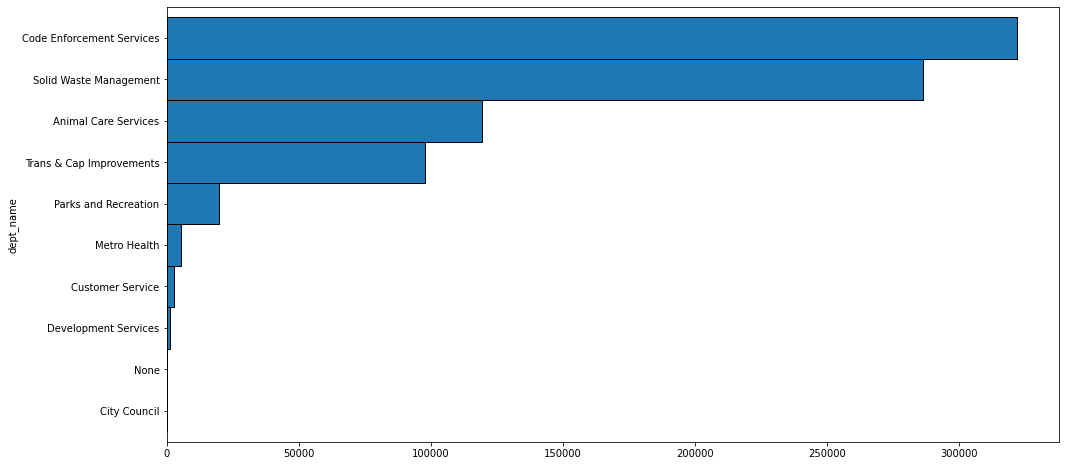

In [65]:
# How many different cases are there, by department?
df.groupby("dept_name").agg(count("case_id").alias("count_case_id")).orderBy(
    "count_case_id", ascending=False
).show(truncate=False)


(
    df.groupby("dept_name")
    .agg(count("case_id").alias("count_case_id"))
    .toPandas()
    .set_index("dept_name")
    .count_case_id.sort_values(ascending=True)
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8),)
)

plt.show()

+-------------------------+------------+
|dept_name                |percent_late|
+-------------------------+------------+
|Customer Service         |70.0        |
|null                     |67.0        |
|Development Services     |60.0        |
|Animal Care Services     |20.0        |
|Parks and Recreation     |19.0        |
|Metro Health             |16.0        |
|Solid Waste Management   |12.0        |
|Code Enforcement Services|8.0         |
|Trans & Cap Improvements |6.0         |
|City Council             |0.0         |
+-------------------------+------------+



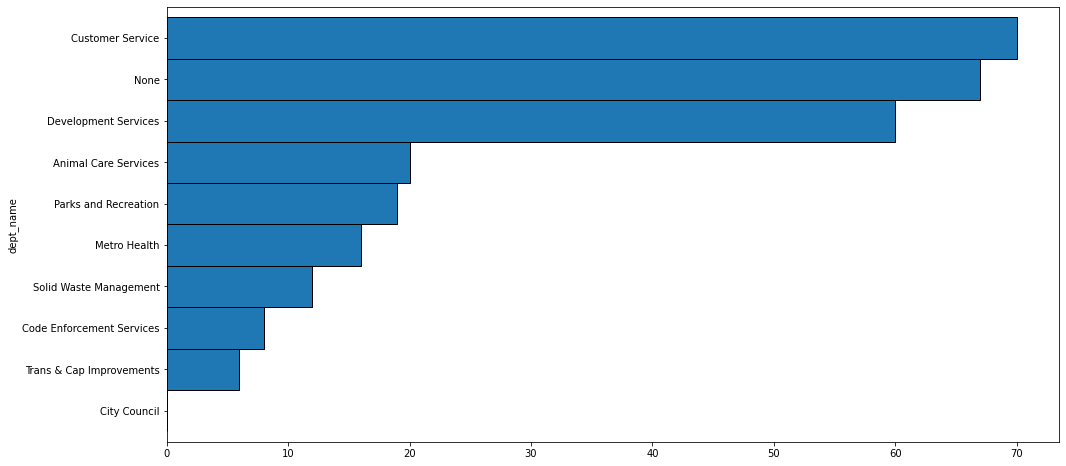

In [66]:
# Does the percentage of cases that are late vary by department?
(
    df.select(col("case_late"), col("dept_name"))
    .groupBy("dept_name")
    .agg(
        round(mean(when(col("case_late") == "true", 1).otherwise(0) * 100)).alias(
            "percent_late"
        )
    )
    .orderBy("percent_late", ascending=False)
    .show(truncate=False)
)


(
    df.select(col("case_late"), col("dept_name"))
    .groupBy("dept_name")
    .agg(
        round(mean(when(col("case_late") == "true", 1).otherwise(0) * 100)).alias(
            "percent_late"
        )
    )
    .toPandas()
    .set_index("dept_name")
    .percent_late.sort_values(ascending=True)
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)


plt.show()

+-------------------------+------------------+
|dept_name                |avg_num_days_late |
+-------------------------+------------------+
|null                     |210.89201994318182|
|Customer Service         |88.18248182589822 |
|Development Services     |67.22248485687263 |
|Code Enforcement Services|48.085502375106884|
|Animal Care Services     |23.4467296347382  |
|Parks and Recreation     |22.427807192724135|
|Trans & Cap Improvements |10.662950455078674|
|Solid Waste Management   |7.1471727895574135|
|Metro Health             |6.494699602827871 |
+-------------------------+------------------+



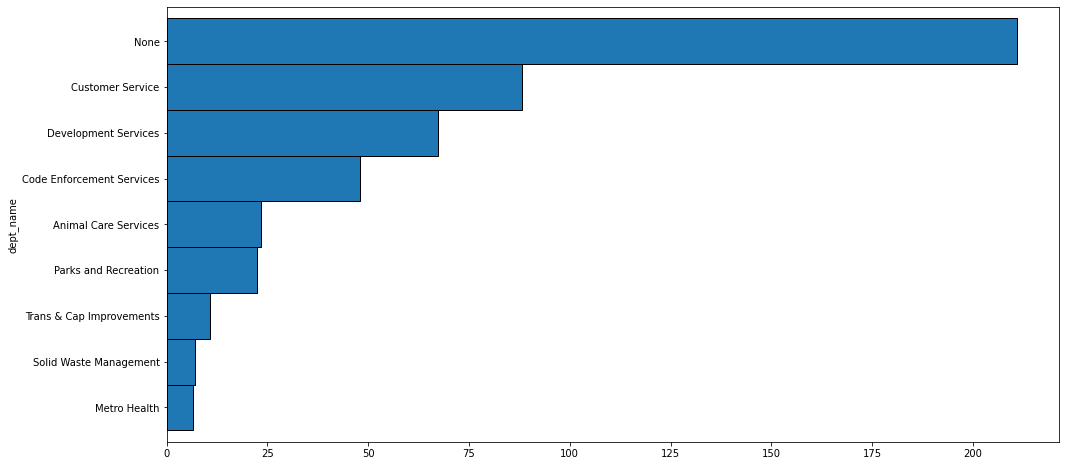

In [67]:
# On average, how late are the late cases by department?
(
    df.where("case_late")
    .select(col("num_days_late"), col("dept_name"))
    .groupBy("dept_name")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .orderBy("avg_num_days_late", ascending=False)
    .show(truncate=False)
)

(
    df.where("case_late")
    .select(col("num_days_late"), col("dept_name"))
    .groupBy("dept_name")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .toPandas()
    .set_index("dept_name")
    .avg_num_days_late.sort_values(ascending=True)
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)

plt.show()

+------------------------------+------------------+
|service_request_type          |avg_num_days_late |
+------------------------------+------------------+
|Zoning: Recycle Yard          |210.89201994318182|
|Zoning: Junk Yards            |200.20517608494276|
|Structure/Housing Maintenance |190.20707698509807|
|Donation Container Enforcement|171.09115313942615|
|Storage of Used Mattress      |163.96812829714287|
+------------------------------+------------------+
only showing top 5 rows



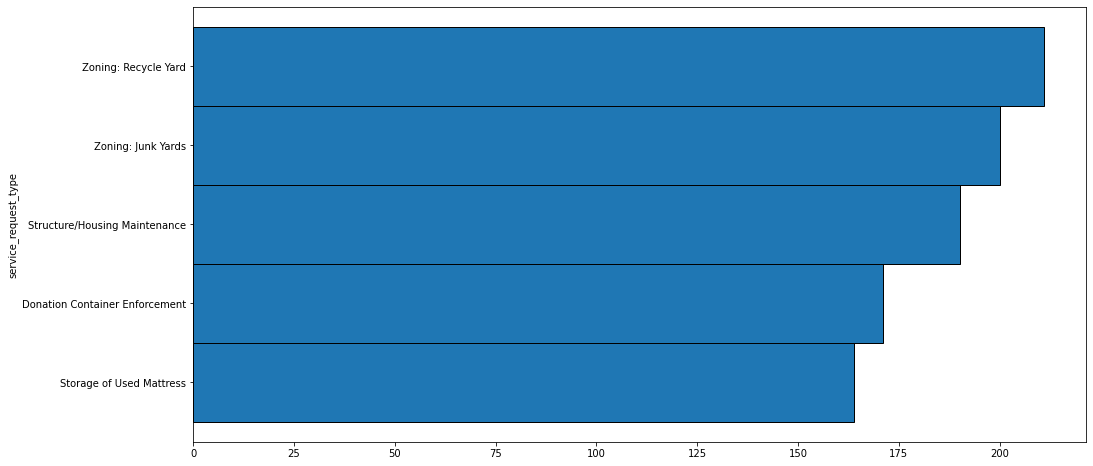

In [68]:
# What is the service type that is the most late? Just for Parks & Rec?
(
    df.where("case_late")
    .select(col("num_days_late"), col("service_request_type"))
    .groupBy("service_request_type")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .orderBy("avg_num_days_late", ascending=False)
    .show(5, truncate=False)
)

(
    df.where("case_late")
    .select(col("num_days_late"), col("service_request_type"))
    .groupBy("service_request_type")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .toPandas()
    .set_index("service_request_type")
    .avg_num_days_late.sort_values(ascending=True)
    .tail(5)
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)

plt.show()

+-------------------------------------+------------------+
|service_request_type                 |avg_num_days_late |
+-------------------------------------+------------------+
|Amenity Park Improvement             |76.60603677123078 |
|Major Park Improvement Install       |75.79450367282354 |
|Reservation Assistance               |66.03116319       |
|Park Building Maint Invest           |59.367469802695666|
|Sportfield Lighting                  |52.034858419575656|
|Electrical                           |42.951971658345116|
|Tree Removal                         |40.28404224560715 |
|Landscape Maintenance                |38.86797941326316 |
|Heavy Equipment                      |38.56625730831579 |
|Miscellaneous Park Equipment         |33.62472491253488 |
|Tree Trimming/Maintenance            |30.563700002936045|
|General Building Maintenance         |28.192905974561906|
|Masonry                              |27.989420392890622|
|Painting                             |25.40455175628260

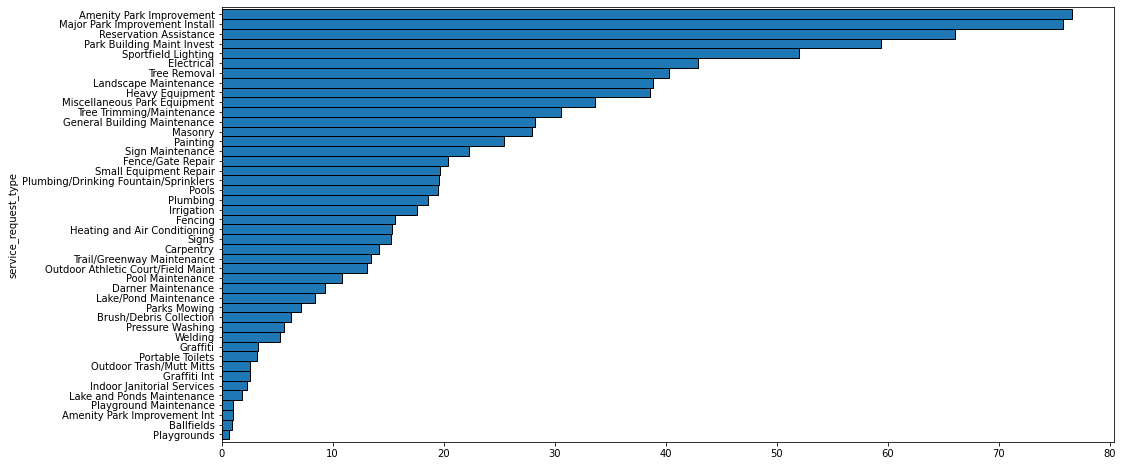

In [69]:
# Just for Parks & Rec?
(
    df.filter(df.dept_name == "Parks and Recreation")
    .where("case_late")
    .select(col("num_days_late"), col("service_request_type"))
    .groupBy("service_request_type")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .orderBy("avg_num_days_late", ascending=False)
    .show(truncate=False)
)

(
    df.filter(df.dept_name == "Parks and Recreation")
    .where("case_late")
    .select(col("num_days_late"), col("service_request_type"))
    .groupBy("service_request_type")
    .agg(mean("num_days_late").alias("avg_num_days_late"))
    .toPandas()
    .set_index("service_request_type")
    .avg_num_days_late.sort_values(ascending=True)
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)

plt.show()

+--------------------+---------------------------------+--------------+
|dept_name           |service_request_type             |count_of_cases|
+--------------------+---------------------------------+--------------+
|Development Services|Street Light Existing Res Sub Div|1342          |
|Development Services|Street Light New Development     |55            |
+--------------------+---------------------------------+--------------+

+-------------------------+--------------------------------------+--------------+
|dept_name                |service_request_type                  |count_of_cases|
+-------------------------+--------------------------------------+--------------+
|Code Enforcement Services|Overgrown Yard/Trash                  |66403         |
|Code Enforcement Services|Bandit Signs                          |32968         |
|Code Enforcement Services|Front Or Side Yard Parking            |28920         |
|Code Enforcement Services|Junk Vehicle On Private Property      |21649    

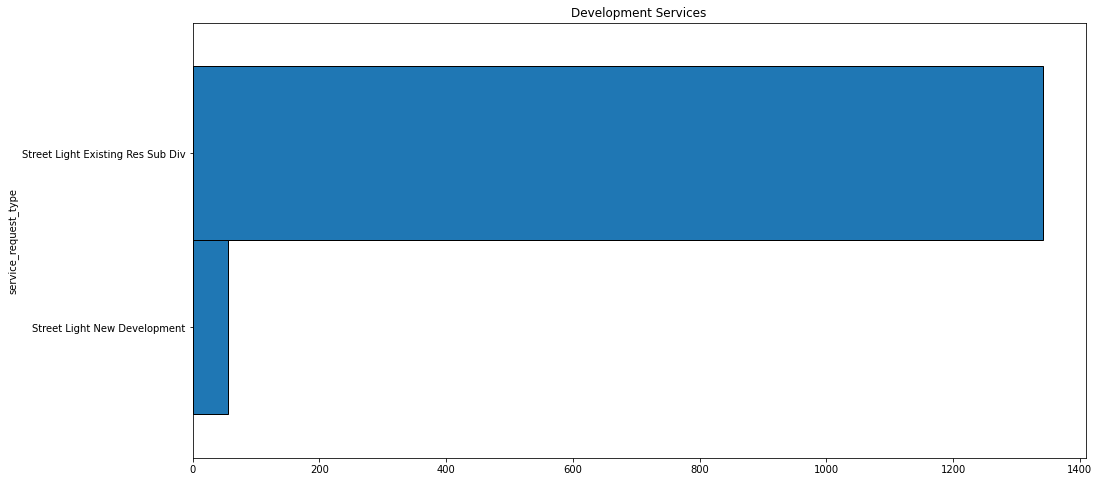

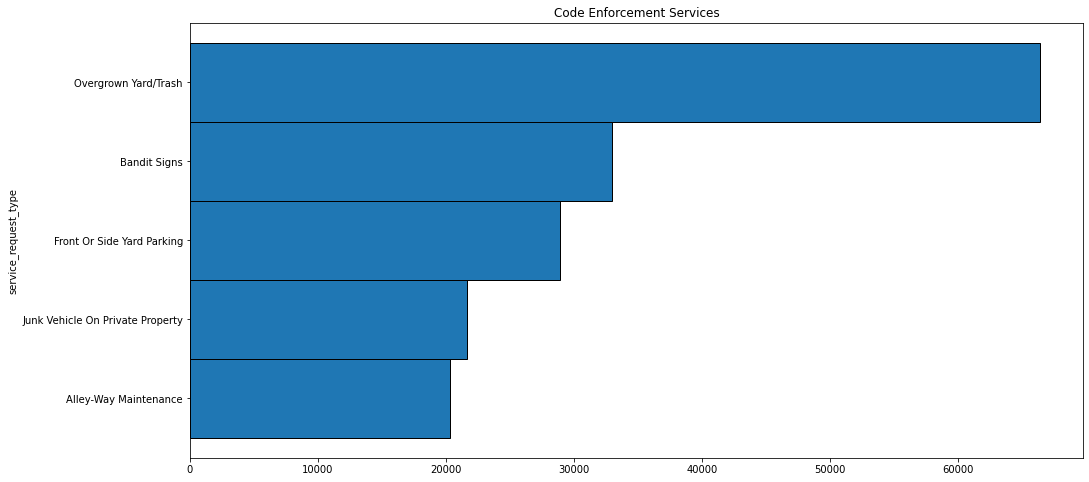

In [70]:
# For the DSD/Code Enforcement department, what are the most common service request types? 
# Look at other departments too.
(
    df.filter((df.dept_name == "Development Services"))
    .select(col("dept_name"), col("service_request_type"), col("case_id"))
    .groupBy(["dept_name", "service_request_type"])
    .agg(count("case_id").alias("count_of_cases"))
    .orderBy("count_of_cases", ascending=False)
    .show(5, truncate=False)
)

(
    df.filter((df.dept_name == "Code Enforcement Services"))
    .select(col("dept_name"), col("service_request_type"), col("case_id"))
    .groupBy(["dept_name", "service_request_type"])
    .agg(count("case_id").alias("count_of_cases"))
    .orderBy("count_of_cases", ascending=False)
    .show(truncate=False)
)

(
    df.filter((df.dept_name == "Development Services"))
    .select(col("dept_name"), col("service_request_type"), col("case_id"))
    .groupBy(["dept_name", "service_request_type"])
    .agg(count("case_id").alias("count_of_cases"))
    .toPandas()
    .set_index("service_request_type")
    .count_of_cases.sort_values(ascending=True)
    .tail()
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)

plt.title("Development Services")
plt.show()

(
    df.filter((df.dept_name == "Code Enforcement Services"))
    .select(col("dept_name"), col("service_request_type"), col("case_id"))
    .groupBy(["dept_name", "service_request_type"])
    .agg(count("case_id").alias("count_of_cases"))
    .toPandas()
    .set_index("service_request_type")
    .count_of_cases.sort_values(ascending=True)
    .tail()
    .plot.barh(width=1, edgecolor="black", figsize=(16, 8))
)

plt.title("Code Enforcement Services")
plt.show()